In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import pandas as pd

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go

In [3]:
d1 = pd.read_csv('/Users/borondics/Documents/DATA/@Soleil/SMIS/' +
                 '2018.03.10_SMIS thermocouples data history/Smis-2017-2018-b.dat', delimiter=',')

In [4]:
d1.columns

Index(['time', 't1', 't2', 't3', 't4', 't5', 't6', 't7'], dtype='object')

In [5]:
def makepair(mydataframe, colname, plotme):
    mytime = mydataframe['time'][mydataframe[colname].notna()]
    mydata = mydataframe[colname][mydataframe[colname].notna()]
    mytime = pd.to_datetime(mytime)

    df = pd.DataFrame({
        colname : mydata,
        'timestamp' : mytime
    })
    s = df.set_index('timestamp')[colname]
    
    if plotme:
        s.plot()
        
    return s

In [6]:
for column in d1.columns[1:]:
    print(column)
    
    e = makepair(d1, column, 0)
    e.plot(figsize=(16,8), legend=True)

t1
t2
t3
t4
t5
t6
t7


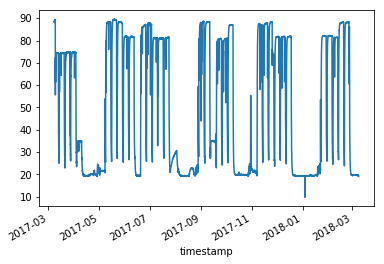

In [7]:
a = makepair(d1, 't7', 1)

In [8]:
# data = [go.Scatter( x=df['Date'], y=df['AAPL.Close'] )]
k = 200
data = [go.Scatter( x=a.index[0:k], y=a[0:k])]

py.iplot(data, filename='pandas-time-series')

KeyboardInterrupt: 

In [ ]:
a.data

In [ ]:
# Learn about API authentication here: https://plot.ly/pandas/getting-started
# Find your api_key here: https://plot.ly/settings/api

import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")

data = [go.Scatter( x=df['Date'], y=df['AAPL.Close'] )]

py.iplot(data, filename='pandas-time-series')